## Model AI to predict RUL battery

#### Import librairies

In [10]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

In [11]:
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
Pandas: 2.2.3
Numpy: 2.0.2
Sklearn: 1.5.2
Matplotlib: 3.9.2
Keras: 3.6.0


#### Load dataset

In [12]:
data = pd.read_csv("discharge.csv")

#### Exploration dataset

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169766 entries, 0 to 169765
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Voltage_measured      169766 non-null  float64
 1   Current_measured      169766 non-null  float64
 2   Temperature_measured  169766 non-null  float64
 3   Current_charge        169766 non-null  float64
 4   Voltage_charge        169766 non-null  float64
 5   Time                  169766 non-null  float64
 6   Capacity              169766 non-null  float64
 7   id_cycle              169766 non-null  int64  
 8   type                  169766 non-null  object 
 9   ambient_temperature   169766 non-null  int64  
 10  time                  169766 non-null  float64
 11  Battery               169766 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 15.5+ MB
None


In [14]:
print(data.shape)
print(data.dtypes)

(169766, 12)
Voltage_measured        float64
Current_measured        float64
Temperature_measured    float64
Current_charge          float64
Voltage_charge          float64
Time                    float64
Capacity                float64
id_cycle                  int64
type                     object
ambient_temperature       int64
time                    float64
Battery                  object
dtype: object


In [15]:
print(data.head())

   Voltage_measured  Current_measured  Temperature_measured  Current_charge  \
0          3.974871         -2.012528             24.389085          1.9982   
1          3.951717         -2.013979             24.544752          1.9982   
2          3.934352         -2.011144             24.731385          1.9982   
3          3.920058         -2.013007             24.909816          1.9982   
4          3.907904         -2.014400             25.105884          1.9982   

   Voltage_charge     Time  Capacity  id_cycle       type  \
0           3.062   35.703  1.856487         1  discharge   
1           3.030   53.781  1.856487         1  discharge   
2           3.011   71.922  1.856487         1  discharge   
3           2.991   90.094  1.856487         1  discharge   
4           2.977  108.281  1.856487         1  discharge   

   ambient_temperature    time Battery  
0                   24  2008.0   B0005  
1                   24  2008.0   B0005  
2                   24  2008.0   B0

In [16]:
data.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,ambient_temperature,time
count,169766.000000,169766.000000,169766.000000,169766.000000,169766.000000,169766.000000,169766.000000,169766.000000,169766.0,169766.0
mean,3.503756,-2.004652,31.985477,1.998999,2.573131,1446.758949,1.584585,80.995187,24.0,2008.0
std,0.245871,0.009801,3.780617,0.000704,0.238604,850.462795,0.189489,45.504296,0.0,0.0
min,1.737030,-2.029098,22.372620,1.998000,0.890000,19.468000,1.153818,1.000000,24.0,2008.0
25%,3.389014,-2.011621,29.419671,1.998200,2.458000,722.016000,1.431808,44.000000,24.0,2008.0
50%,3.507333,-2.009471,31.931205,1.999000,2.578000,1424.813000,1.570257,78.000000,24.0,2008.0
75%,3.665754,-1.991235,34.756413,2.000000,2.733000,2131.113250,1.750291,118.000000,24.0,2008.0
max,4.035025,-1.974808,42.083729,2.000000,3.097000,3690.234000,2.035338,168.000000,24.0,2008.0


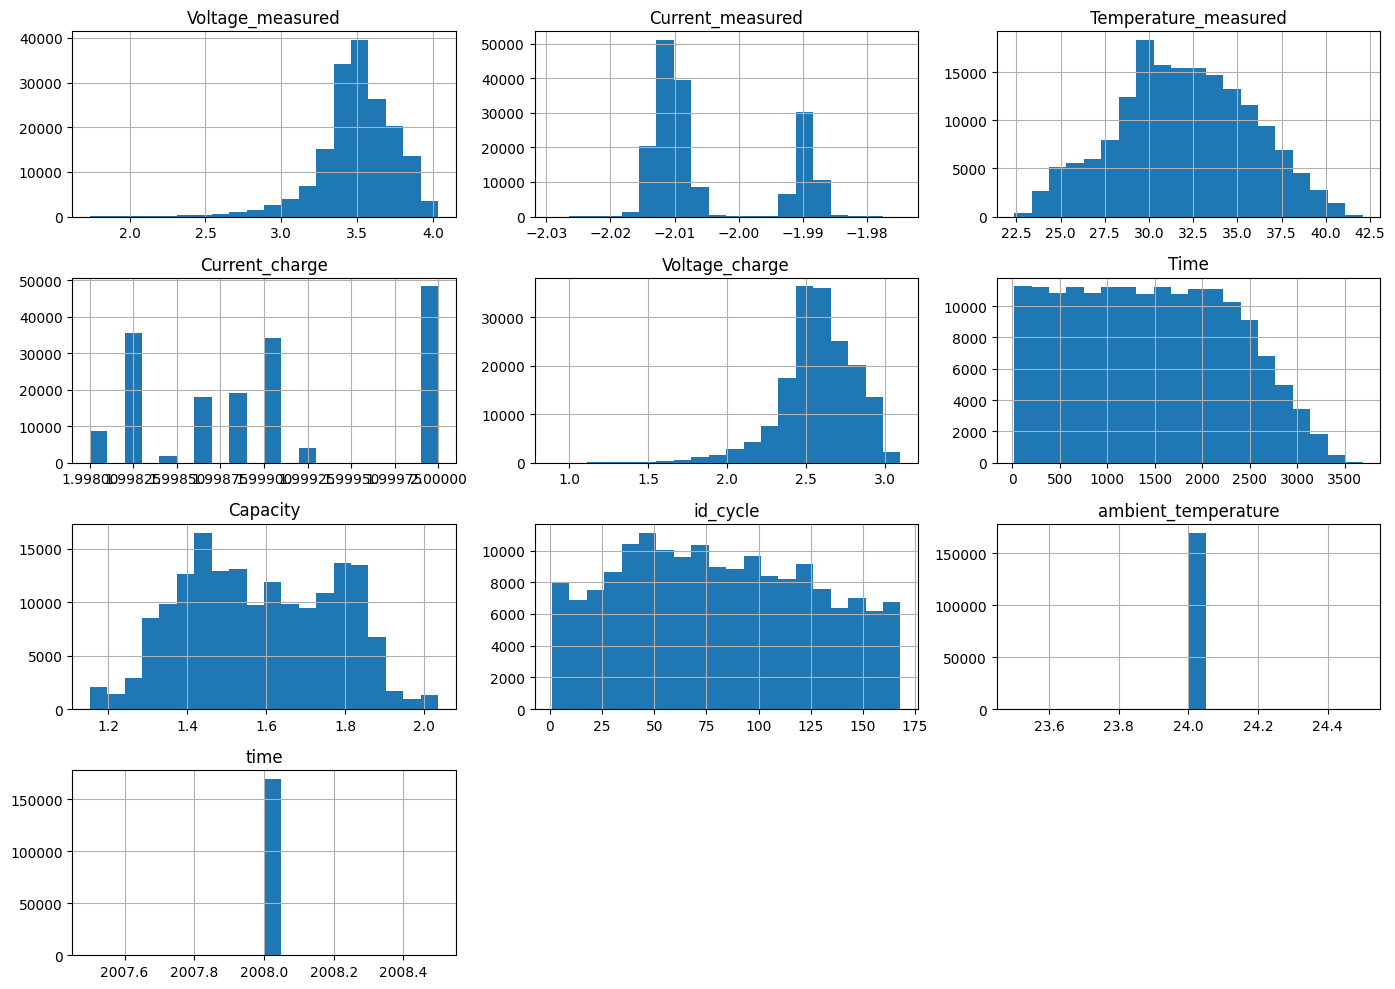

In [17]:
# Histograme de chaque variable numérique
data.hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.show()

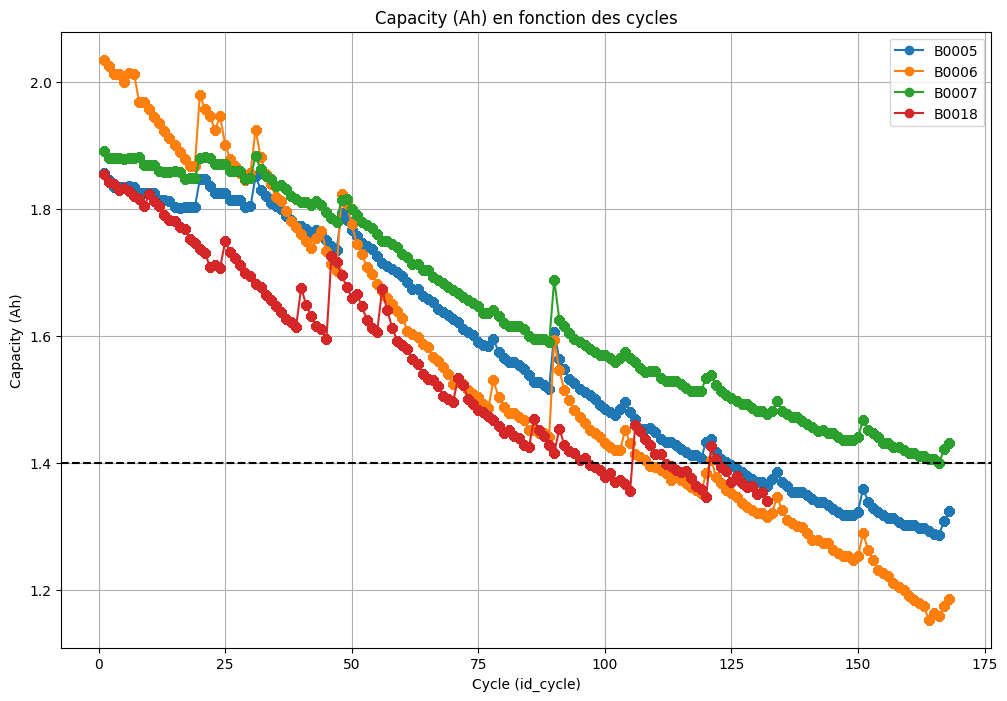

In [18]:
# Tracer Capacity (Ah) en fonction des cycles (id_cycle)
plt.figure(figsize=(12, 8))

# Regrouper les données par batterie et tracer une courbe pour chaque batterie
for battery, group in data.groupby("Battery"):
    plt.plot(group["id_cycle"], group["Capacity"], marker='o', label=f"{battery}")

# Ajouter une ligne en pointillé pour 1.4Ah sans l'ajouter à la légende
plt.axhline(y=1.4, color='black', linestyle='--')

# Ajouter les titres, labels et légende
plt.title("Capacity (Ah) en fonction des cycles")
plt.xlabel("Cycle (id_cycle)")
plt.ylabel("Capacity (Ah)")
plt.legend()
plt.grid()
plt.show()

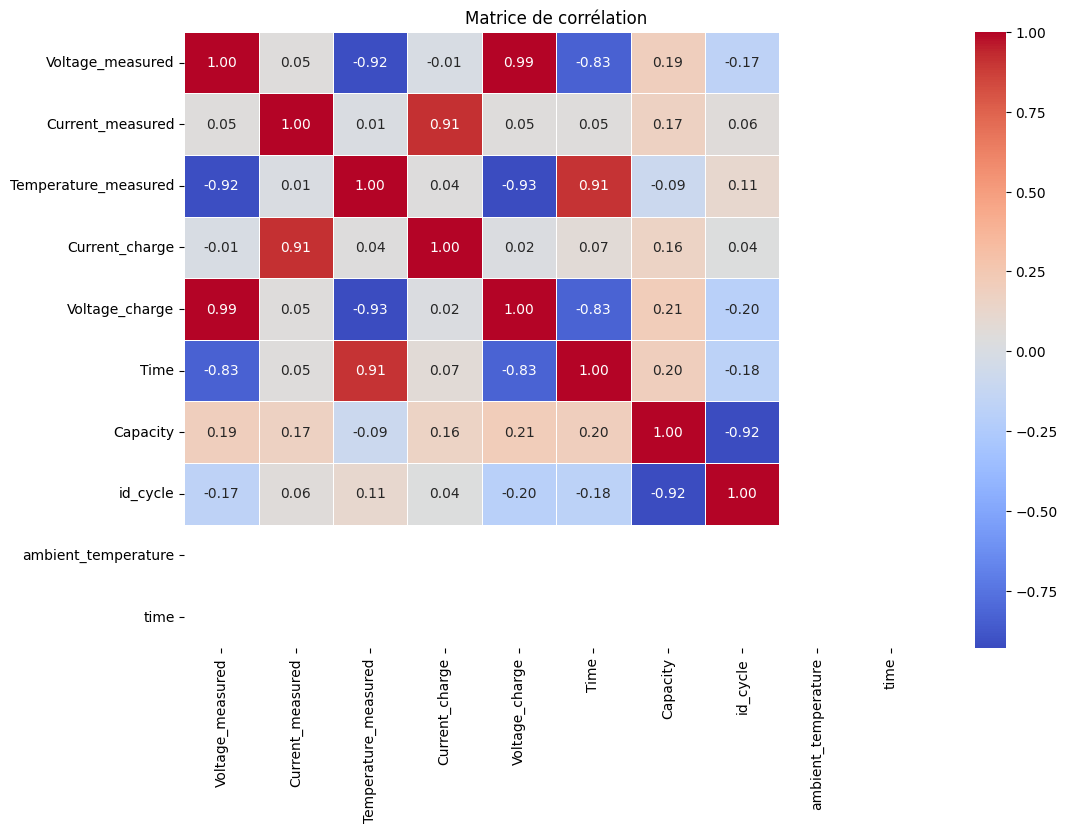

Matrice de Corrélation :
                      Voltage_measured  Current_measured  \
Voltage_measured              1.000000          0.047336   
Current_measured              0.047336          1.000000   
Temperature_measured         -0.917853          0.009532   
Current_charge               -0.007695          0.914405   
Voltage_charge                0.993931          0.045043   
Time                         -0.831407          0.046283   
Capacity                      0.194405          0.173665   
id_cycle                     -0.169656          0.056713   
ambient_temperature                NaN               NaN   
time                               NaN               NaN   

                      Temperature_measured  Current_charge  Voltage_charge  \
Voltage_measured                 -0.917853       -0.007695        0.993931   
Current_measured                  0.009532        0.914405        0.045043   
Temperature_measured              1.000000        0.041760       -0.928149   
Cu

In [19]:
# Conserver toutes les colonnes du DataFrame
data_with_battery = data.copy()

# Sélectionner uniquement les colonnes numériques
data_numeric = data_with_battery.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
corr_matrix = data_numeric.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

# Affichage des valeurs de la matrice de corrélation
print("Matrice de Corrélation :")
print(corr_matrix)


# Calculs liés à la batterie

## Capacité nominale et tension nominale
La capacité nominale et la tension nominale sont définies comme :
$$
C_{\text{nominal}} = 2.0 \text{ Ah}, \quad V_{\text{nominal}} = 3.7 \text{ V}
$$

## Calcul de la capacité initiale
La capacité initiale de chaque batterie correspond à la capacité maximale mesurée :
$$
C_{\text{initial}, i} = \max(C_{i})
$$
où \( C_{i} \) est la capacité mesurée pour une batterie donnée.

## Calcul de l'Index de Santé (HI)
L'Index de Santé (HI) est défini par :
$$
HI_i = \left(\frac{C_i}{C_{\text{initial}, i}}\right) \times \left(\frac{V_{\text{mesuré}, i}}{V_{\text{nominal}}}\right) \times 100
$$
où :
- \( C_i \) est la capacité mesurée au cycle \( i \),
- \( V_{\text{mesuré}, i} \) est la tension mesurée.

## Seuil de fin de vie (EOL)
Le seuil de fin de vie (EOL) est fixé à :
$$
EOL_i = 0.7 \times C_{\text{initial}, i}
$$

## Détermination du cycle max
Le cycle maximal avant d'atteindre l'EOL est :
$$
\text{Cycle}_{\max, i} = \max \left( \text{cycle}_j \mid C_j \geq 0.7 \times C_{\text{initial}, i} \right)
$$
Si aucune capacité ne dépasse ce seuil, on prend le dernier cycle mesuré.

## Calcul du Remaining Useful Life (RUL)
Le nombre de cycles restants avant d'atteindre l'EOL est :
$$
RUL_i = \text{Cycle}_{\max, i} - \text{Cycle}_i
$$


In [ ]:
# Capacité nominale et tension nominale 
C_nominal = 2.0  # Capacité nominale en Ah
V_nominal = 3.7  # Tension nominale en V

# Calcul de la capacité initiale pour chaque batterie (max de la capacité mesurée)
data['Capacity_initial'] = data.groupby('Battery', observed=False)['Capacity'].transform('max')

# Calcul de l'Index de Santé (HI) en utilisant la capacité mesurée et la tension mesurée
data['HI'] = (data['Capacity'] / data['Capacity_initial']) * (data['Voltage_measured'] / V_nominal) * 100

# Déterminer le seuil de fin de vie (EOL) à 70% de la capacité initiale
EOL_threshold = 0.7 * data['Capacity_initial']

# Fonction pour déterminer le cycle max
def calculate_cycle_max(group):
    capacity_threshold = 0.7 * group['Capacity_initial'].iloc[0]
    cycle_max = group[group['Capacity'] >= capacity_threshold]['id_cycle'].max()
    
    if pd.isna(cycle_max):
        cycle_max = group['id_cycle'].max()
    return cycle_max

# Appliquer la fonction pour calculer Cycle_max tout en excluant les colonnes de regroupement
data['Cycle_max'] = data.groupby('Battery', group_keys=False).apply(calculate_cycle_max)

# Vérification des valeurs NaN dans Cycle_max et remplir les NaN avec l a fin du cycle actuel
data['Cycle_max'] = data['Cycle_max'].fillna(data.groupby('Battery')['id_cycle'].transform('max'))

# Calculer le RUL : cycles restants avant d'atteindre le seuil EOL
data['RUL'] = data['Cycle_max'] - data['id_cycle']

# Affichage des premières lignes après ajout du RUL
print(data[['Battery', 'id_cycle', 'Capacity', 'Voltage_measured', 'HI', 'RUL']].head())


  Battery  id_cycle  Capacity  Voltage_measured          HI    RUL
0   B0005         1  1.856487          3.974871  107.428944  167.0
1   B0005         1  1.856487          3.951717  106.803154  167.0
2   B0005         1  1.856487          3.934352  106.333851  167.0
3   B0005         1  1.856487          3.920058  105.947525  167.0
4   B0005         1  1.856487          3.907904  105.619014  167.0


C:\Users\DHA2MLS\AppData\Local\Temp\ipykernel_20636\1993975540.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['Cycle_max'] = data.groupby('Battery', group_keys=False).apply(calculate_cycle_max)


In [21]:
data.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,ambient_temperature,time,Capacity_initial,HI,Cycle_max,RUL
count,169766.000000,169766.000000,169766.000000,169766.000000,169766.000000,169766.000000,169766.000000,169766.000000,169766.0,169766.0,169766.000000,169766.000000,169766.000000,169766.000000
mean,3.503756,-2.004652,31.985477,1.998999,2.573131,1446.758949,1.584585,80.995187,24.0,2008.0,1.912769,78.748390,161.216097,80.220910
std,0.245871,0.009801,3.780617,0.000704,0.238604,850.462795,0.189489,45.504296,0.0,0.0,0.074363,12.347532,14.078364,44.386579
min,1.737030,-2.029098,22.372620,1.998000,0.890000,19.468000,1.153818,1.000000,24.0,2008.0,1.855005,37.069230,132.000000,0.000000
25%,3.389014,-2.011621,29.419671,1.998200,2.458000,722.016000,1.431808,44.000000,24.0,2008.0,1.856487,69.936354,168.000000,43.000000
50%,3.507333,-2.009471,31.931205,1.999000,2.578000,1424.813000,1.570257,78.000000,24.0,2008.0,1.891052,78.852673,168.000000,82.000000
75%,3.665754,-1.991235,34.756413,2.000000,2.733000,2131.113250,1.750291,118.000000,24.0,2008.0,2.035338,88.643126,168.000000,117.000000
max,4.035025,-1.974808,42.083729,2.000000,3.097000,3690.234000,2.035338,168.000000,24.0,2008.0,2.035338,108.133106,168.000000,167.000000


Index de Santé (HI) :

Le HI est un indicateur de la santé de la batterie. Une batterie est considérée comme en meilleur état lorsque son HI est élevé et en mauvais état lorsque le HI est faible.
Comme la batterie vieillit et se dégrade, sa capacité et ses performances diminuent. Cela se reflète dans la diminution du HI.
En d’autres termes, plus la batterie vieillit, plus son HI baisse.

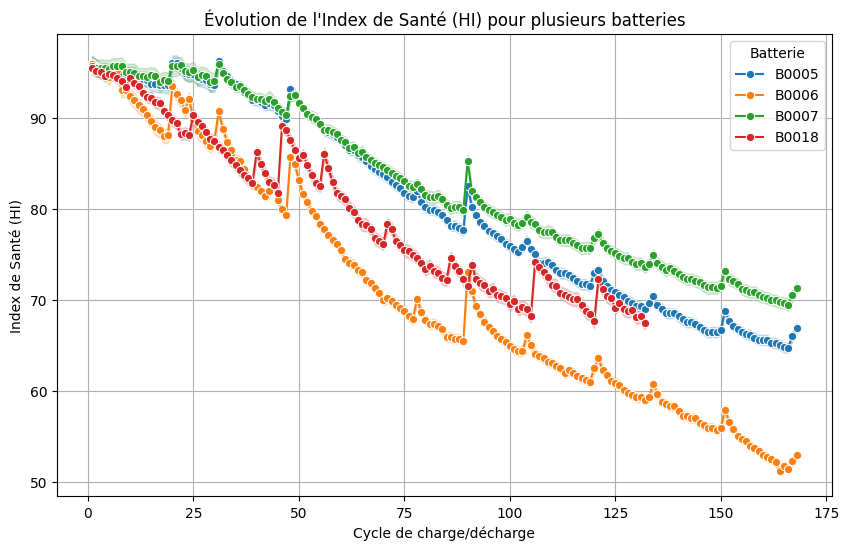

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='id_cycle', y='HI', data=data, hue='Battery', marker='o')
plt.title('Évolution de l\'Index de Santé (HI) pour plusieurs batteries')
plt.xlabel('Cycle de charge/décharge')
plt.ylabel('Index de Santé (HI)')
plt.grid(True)
plt.legend(title='Batterie')
plt.show()


Remaining Useful Life (RUL) :

Le RUL représente la durée de vie restante de la batterie avant qu'elle ne soit complètement dégradée. Autrement dit, le RUL indique combien de cycles il reste à la batterie avant que sa capacité soit considérée comme épuisée.
Lorsqu’une batterie commence à se dégrader, son RUL est élevé au début (beaucoup de cycles à venir), mais au fur et à mesure que la batterie se dégrade, le RUL diminue.
Lorsque le HI diminue, cela signifie que la batterie se rapproche de la fin de sa durée de vie utile, donc le RUL diminue au fur et à mesure que la batterie devient plus dégradée.

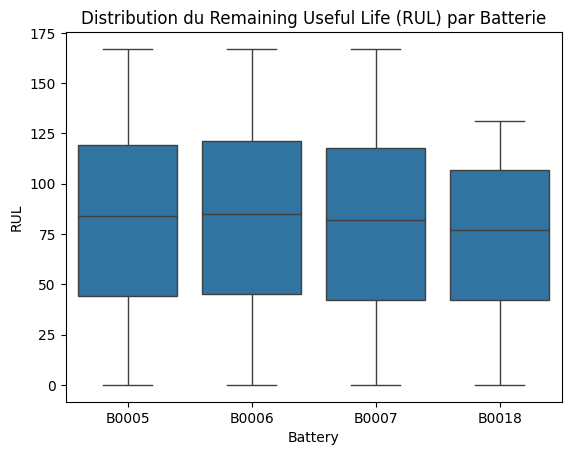

           count       mean        std  min   25%   50%    75%    max
Battery                                                              
B0005    45122.0  81.850893  45.457860  0.0  44.0  84.0  119.0  167.0
B0006    44354.0  83.221806  45.688725  0.0  45.0  85.0  121.0  167.0
B0007    48299.0  80.713203  45.569195  0.0  42.0  82.0  118.0  167.0
B0018    31991.0  73.018036  37.985252  0.0  42.0  77.0  107.0  131.0


In [23]:
# Afficher la distribution des RUL pour chaque batterie
sns.boxplot(x='Battery', y='RUL', data=data)
plt.title('Distribution du Remaining Useful Life (RUL) par Batterie')
plt.show()

# Afficher des statistiques descriptives sur le RUL pour chaque batterie
print(data.groupby('Battery')['RUL'].describe())


## Model Creation

Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Filtrer les données en fonction des batteries spécifiques pour l'entraînement et le test
train_batteries = ['B0018', 'B0006', 'B0007']
test_battery = 'B0005'

# Séparer les données en fonction des batteries d'entraînement et de test
train_data = data[data['Battery'].isin(train_batteries)]
test_data = data[data['Battery'] == test_battery]

# Sélectionner les caractéristiques d'entrée (X) et la variable cible (y)
X_train = train_data[["Voltage_measured", "Current_measured", "Temperature_measured", "Current_charge", "Voltage_charge", "Capacity"]]
y_train = train_data['RUL']

X_test = test_data[["Voltage_measured", "Current_measured", "Temperature_measured", "Current_charge", "Voltage_charge", "Capacity"]]
y_test = test_data['RUL']

# Mise à l'échelle des données (important pour certains modèles, comme la régression linéaire)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle de régression linéaire
model_lr = LinearRegression()

# Entraînement du modèle
model_lr.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_lr = model_lr.predict(X_train_scaled)

# Calcul du MSE et R² sur l'ensemble d'entraînement
train_mse = mean_squared_error(y_train, y_train_pred_lr)
train_r2 = r2_score(y_train, y_train_pred_lr)

# Prédictions sur l'ensemble de test
y_test_pred_lr = model_lr.predict(X_test_scaled)

# Calcul du MSE et R² sur l'ensemble de test
test_mse = mean_squared_error(y_test, y_test_pred_lr)
test_r2 = r2_score(y_test, y_test_pred_lr)

# Affichage des résultats d'entraînement et de test
print(f"--- Régression Linéaire ---")
print(f"Sur l'ensemble d'entraînement :")
print(f"MSE : {train_mse}")
print(f"R² : {train_r2}")
print("-" * 30)
print(f"Sur l'ensemble de test :")
print(f"MSE : {test_mse}")
print(f"R² : {test_r2}")


--- Régression Linéaire ---
Sur l'ensemble d'entraînement :
MSE : 176.82465622743297
R² : 0.9085712815558499
------------------------------
Sur l'ensemble de test :
MSE : 265.4768156426457
R² : 0.8715251106348362


#### XGBoost

In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Filtrer les données en fonction des batteries spécifiques pour l'entraînement et le test
train_batteries = ['B0018', 'B0006', 'B0007']
test_battery = 'B0005'

# Séparer les données en fonction des batteries d'entraînement et de test
train_data = data[data['Battery'].isin(train_batteries)]
test_data = data[data['Battery'] == test_battery]

# Sélectionner les caractéristiques d'entrée (X) et la variable cible (y)
X_train = train_data[["Voltage_measured", "Current_measured", "Temperature_measured", "Current_charge", "Voltage_charge", "Capacity"]]
y_train = train_data['RUL']

X_test = test_data[["Voltage_measured", "Current_measured", "Temperature_measured", "Current_charge", "Voltage_charge", "Capacity"]]
y_test = test_data['RUL']

# Mise à l'échelle des données (important pour certains modèles, comme XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle XGBoost avec ajustements pour éviter l'overfitting
model_xgb = XGBRegressor(
    n_estimators=200,        # Plus d'arbres, mais un taux d'apprentissage plus faible
    learning_rate=0.05,      # Taux d'apprentissage plus faible
    max_depth=6,             # Limiter la profondeur des arbres
    subsample=0.8,           # Utilisation d'un sous-échantillon des données pour chaque arbre
    colsample_bytree=0.8,    # Utilisation de moins de caractéristiques par arbre
    alpha=0.1,               # Régularisation L1 (Lasso)
    lambda_=0.1,             # Régularisation L2 (Ridge)
    random_state=42
)

# Entraînement du modèle
model_xgb.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_xgb = model_xgb.predict(X_train_scaled)

# Calcul du MSE et R² sur l'ensemble d'entraînement
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

# Prédictions sur l'ensemble de test
y_test_pred_xgb = model_xgb.predict(X_test_scaled)

# Calcul du MSE et R² sur l'ensemble de test
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

# Affichage des résultats d'entraînement et de test
print(f"--- XGBoost avec régularisation et ajustements ---")
print(f"Sur l'ensemble d'entraînement :")
print(f"MSE : {train_mse_xgb}")
print(f"R² : {train_r2_xgb}")
print("-" * 30)
print(f"Sur l'ensemble de test :")
print(f"MSE : {test_mse_xgb}")
print(f"R² : {test_r2_xgb}")


c:\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:47:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost avec régularisation et ajustements ---
Sur l'ensemble d'entraînement :
MSE : 22.25173750711707
R² : 0.9884945465930123
------------------------------
Sur l'ensemble de test :
MSE : 216.68328358542922
R² : 0.8951382597439649


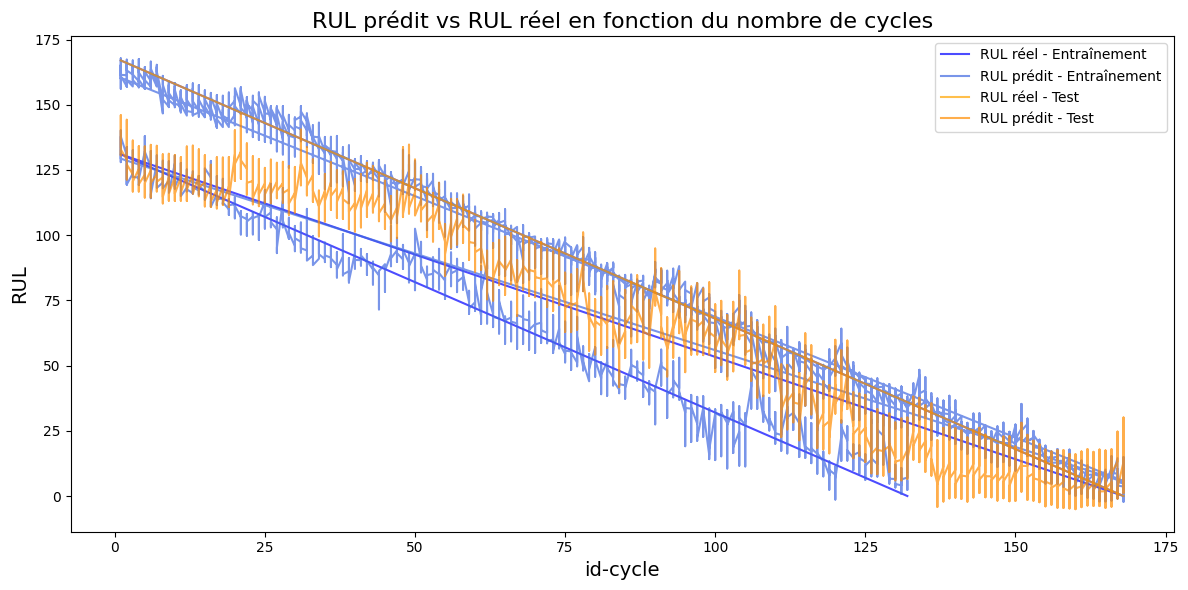

In [26]:
import matplotlib.pyplot as plt

# Vous avez déjà les prédictions et les valeurs réelles pour l'entraînement et le test
# Combine les cycles d'entraînement et de test dans un seul tableau
cycles_train = train_data['id_cycle']  # Supposons que la colonne 'Cycle' existe dans vos données d'entraînement
cycles_test = test_data['id_cycle']    # Supposons que la colonne 'Cycle' existe dans vos données de test

# Plot des résultats
plt.figure(figsize=(12, 6))

# Affichage de RUL réel vs RUL prédit pour l'entraînement
plt.plot(cycles_train, y_train, label='RUL réel - Entraînement', alpha=0.7, color='blue')
plt.plot(cycles_train, y_train_pred_xgb, label='RUL prédit - Entraînement', alpha=0.7, color='royalblue')

# Affichage de RUL réel vs RUL prédit pour le test
plt.plot(cycles_test, y_test, label='RUL réel - Test', alpha=0.7, color='orange')
plt.plot(cycles_test, y_test_pred_xgb, label='RUL prédit - Test', alpha=0.7, color='darkorange')

# Titres et labels
plt.title("RUL prédit vs RUL réel en fonction du nombre de cycles", fontsize=16)
plt.xlabel("id-cycle", fontsize=14)
plt.ylabel("RUL", fontsize=14)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


### Model Export

In [27]:
import joblib

# Enregistrer le modèle XGBoost dans un fichier .pkl
joblib.dump(model_xgb, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [28]:
import joblib
# Sauvegarder le scaler (si vous l'utilisez)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']